### 1. Exploration Data Analysis
### 1.1. Data understanding: 
#### First we will import Train data and Test data. The sizes of the two data are as follows:
#### It was data from https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29 and crawled 
#### reviews from online pharmaceutical review sites.

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Sentiment Package
from textblob import TextBlob

In [105]:
# Load the training and testing data 
df_train = pd.read_csv("drugsComTrain_raw.tsv.txt",sep='\t')
df_test = pd.read_csv("drugsComTest_raw.tsv.txt",sep='\t')

In [4]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [5]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


#### There are six variables except for the unique ID ( Unnamed: 0) that identifies the individual, and review is the key variable.
#### These are additional explanations for variables:
#### drugName (categorical): name of drug
#### condition (categorical): name of condition
#### review (text): patient review
#### rating (numerical): 10 star patient rating
#### date (date): date of review entry
#### usefulCount (numerical): number of users who found review useful
#### The structure of the data is that a patient with a unique ID purchases a drug that meets his condition and writes a review
#### and rating for the drug he/she purchased on the date. Afterwards, if the others read that review and find it helpful. 
#### They will click usefulCount, which will add 1 for the variable.

#### First, we will start exploring variables, starting from uniqueID. We compared the unique number of unique IDs (Unnamed: 0)
#### and the length of the train data to see if the same customer has written multiple reviews, and there weren't more 
#### than one reviews for one customer.

In [6]:
print("unique values count of train : " ,len(set(df_train['Unnamed: 0'].values)))
print("length of train : " ,df_train.shape[0])

unique values count of train :  161297
length of train :  161297


### 1.2. Condition and DrugName columns Analysis:
#### DrugName is closely related to condition, so we have analyzed them together. The unique values of the two variables are 
#### 3671  and 917, respectively. 

In [106]:
df_all = pd.concat([df_train,df_test])

In [8]:
# How many drugs do we have?
drugs = df_all['drugName'].unique().tolist()
drugs

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [9]:
#How many drugs do we have?
len(drugs)

3671

In [10]:
# What is the most popular drug?
# Top 20 Drugs (Most Popular)
df_all['drugName'].value_counts().nlargest(20)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Implanon                              1506
Gabapentin                            1415
Bupropion                             1369
Miconazole                            1344
Venlafaxine                           1338
Medroxyprogesterone                   1308
Citalopram                            1308
Duloxetine                            1256
Lexapro                               1250
Bupropion / naltrexone                1249
Name: drugName, dtype: int64

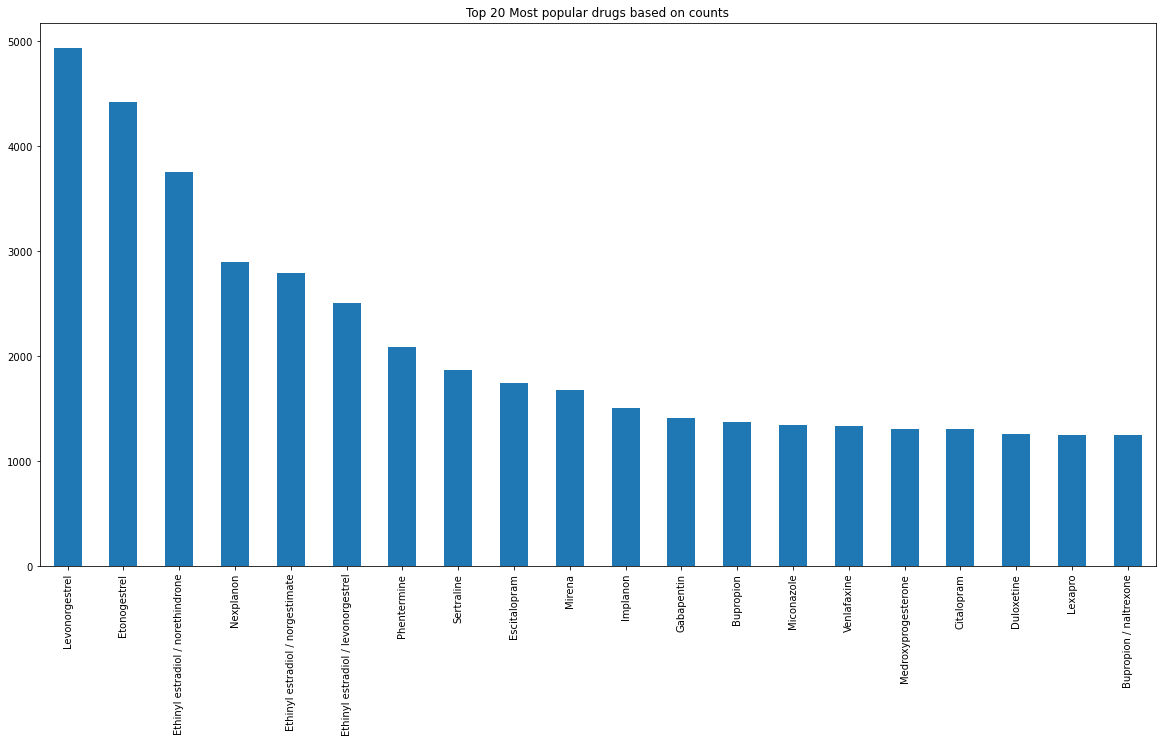

In [11]:
# Top 20 Drugs (Most Popular)
plt.figure(figsize=(20,10))
df_all['drugName'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

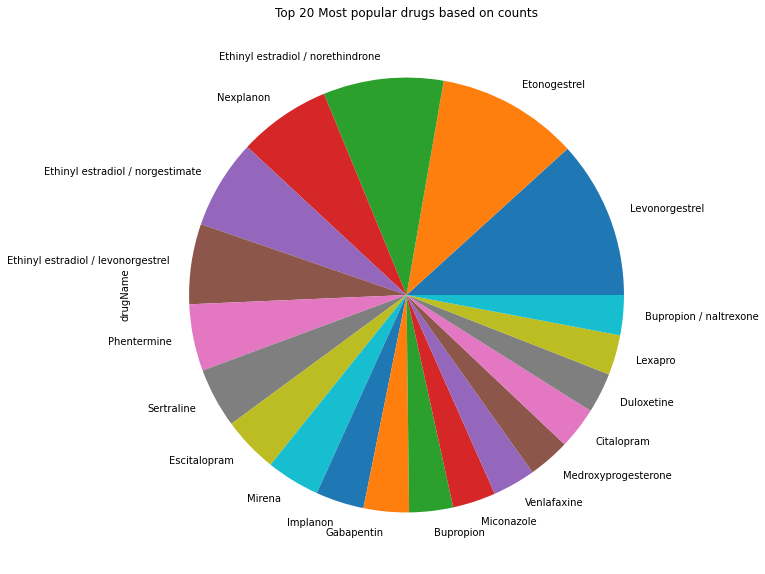

In [12]:
plt.figure(figsize=(20,10))
df_all['drugName'].value_counts().nlargest(20).plot(kind='pie')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

In [13]:
conditions =df_all['condition'].unique().tolist()
conditions

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 nan,
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'S

In [14]:
len(conditions)
# We conclude from the below results that we have 917 different conditions for our dataset. 

917

In [15]:
# Most common conditions
df_all['condition'].value_counts()

Birth Control                                  38436
Depression                                     12164
Pain                                            8245
Anxiety                                         7812
Acne                                            7435
                                               ...  
Asystole                                           1
Steroid Responsive Inflammatory Conditions         1
Linear IgA Disease                                 1
98</span> users found this comment helpful.        1
Hypopituitarism                                    1
Name: condition, Length: 916, dtype: int64

<AxesSubplot:>

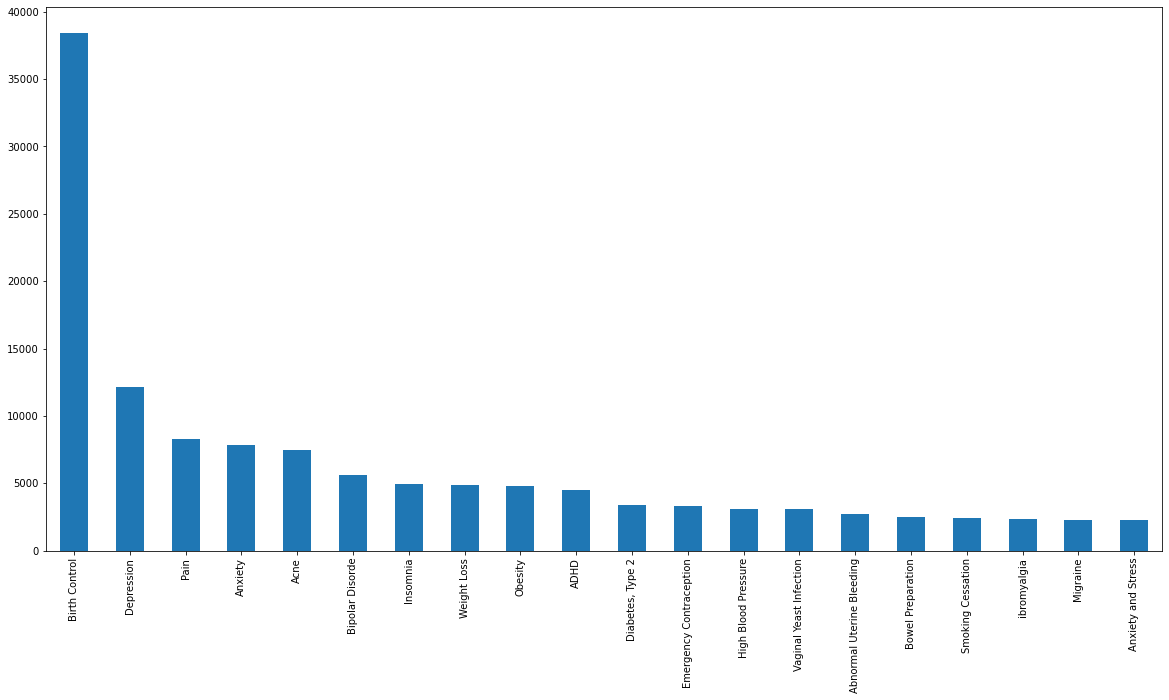

In [16]:
# plotting most 20 common conditions 
plt.figure(figsize=(20,10))
df_all['condition'].value_counts().nlargest(20).plot(kind ='bar')

In [17]:
# Determining the number of drugs per each condition: 
# How many condition has the same drug name: 
df_all.groupby('condition')['drugName'].nunique().nlargest(20)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

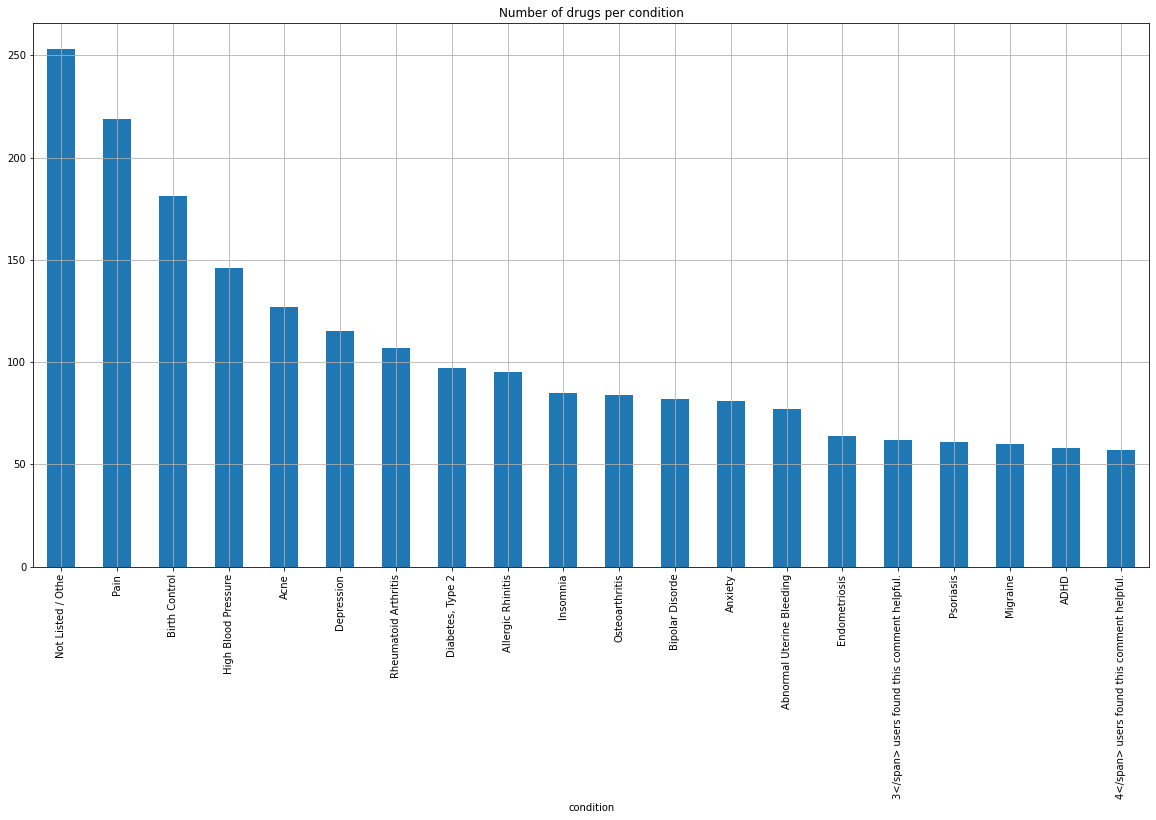

In [18]:
plt.figure(figsize=(20,10))
df_all.groupby('condition')['drugName'].nunique().nlargest(20).plot(kind='bar')
plt.title("Number of drugs per condition")
plt.grid()
plt.show()

In [19]:
# rating analysis 
df_all.groupby('rating').size()

rating
1.0     28918
2.0      9265
3.0      8718
4.0      6671
5.0     10723
6.0      8462
7.0     12547
8.0     25046
9.0     36708
10.0    68005
dtype: int64

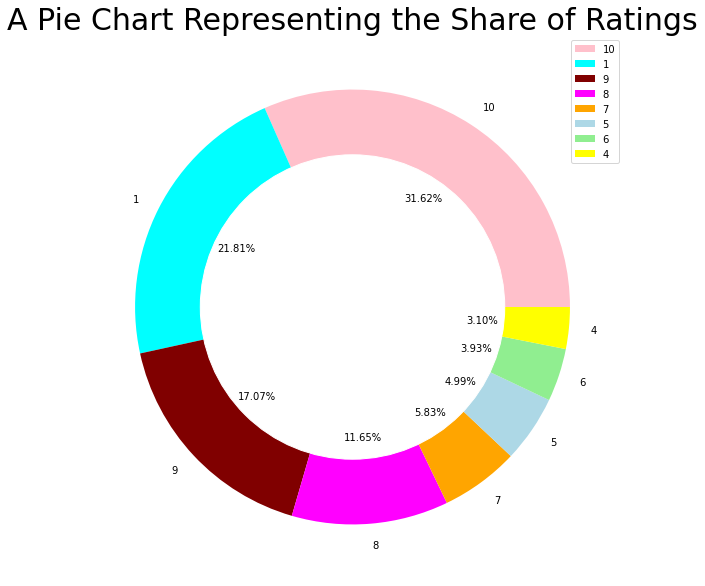

In [20]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'lightblue', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Share of Ratings', fontsize = 30)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

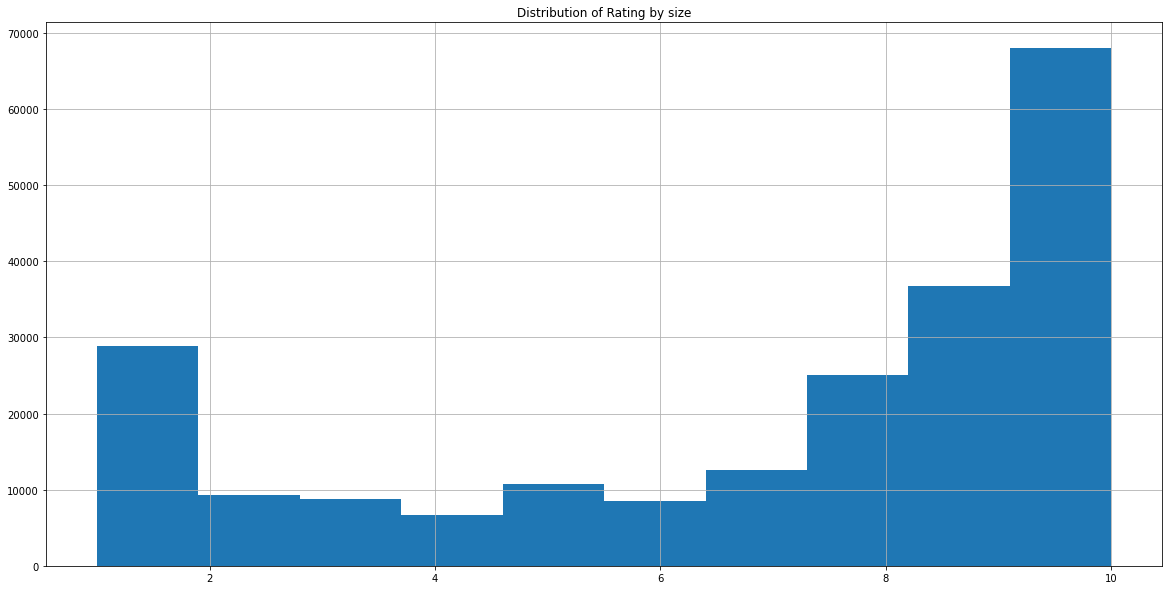

In [21]:
plt.figure(figsize=(20,10))
df_all['rating'].hist()
plt.title('Distribution of Rating by size')
plt.show()

In [22]:
# Average Rating of Drugs
avg_rating = (df_all['rating'].groupby(df_all['drugName']).mean())
avg_rating.tail()

drugName
ZzzQuil                   2.000000
depo-subQ provera 104     5.500000
ella                      7.183099
femhrt                    6.500000
pHisoHex                 10.000000
Name: rating, dtype: float64

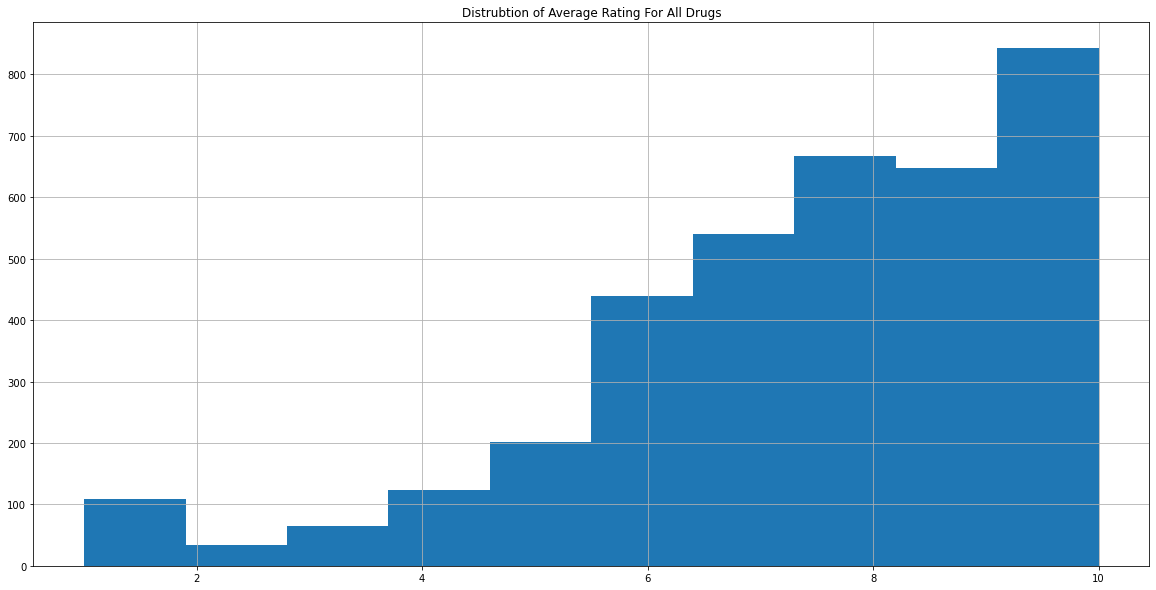

In [23]:
# Average Rating For All Drugs
plt.figure(figsize=(20,10))
avg_rating.hist()
plt.title("Distrubtion of Average Rating For All Drugs")
plt.show()

In [24]:
# Which Drugs have the higest mean/average rating
avg_rating.nlargest(20)

drugName
A + D Cracked Skin Relief                                           10.0
A / B Otic                                                          10.0
Abacavir / lamivudine                                               10.0
Absorbine Jr.                                                       10.0
Accolate                                                            10.0
Acetaminophen / caffeine / magnesium salicylate                     10.0
Acetaminophen / dextromethorphan / doxylamine                       10.0
Acetaminophen / dextromethorphan / guaifenesin / phenylephrine      10.0
Acetaminophen / dextromethorphan / guaifenesin / pseudoephedrine    10.0
Acetaminophen / pseudoephedrine                                     10.0
Acetic acid / antipyrine / benzocaine / polycosanol                 10.0
Acnex                                                               10.0
Acrivastine / pseudoephedrine                                       10.0
Acyclovir / hydrocortisone                

In [25]:
# Useful Count analysis 
# USefulCount is the number of people who benefited from the review 
# We want to know how genuine is the review. 
# To do that, we will apply sentimental analysis to know whether the review is positive or negative
drug_groups = df_all.groupby('drugName').size()

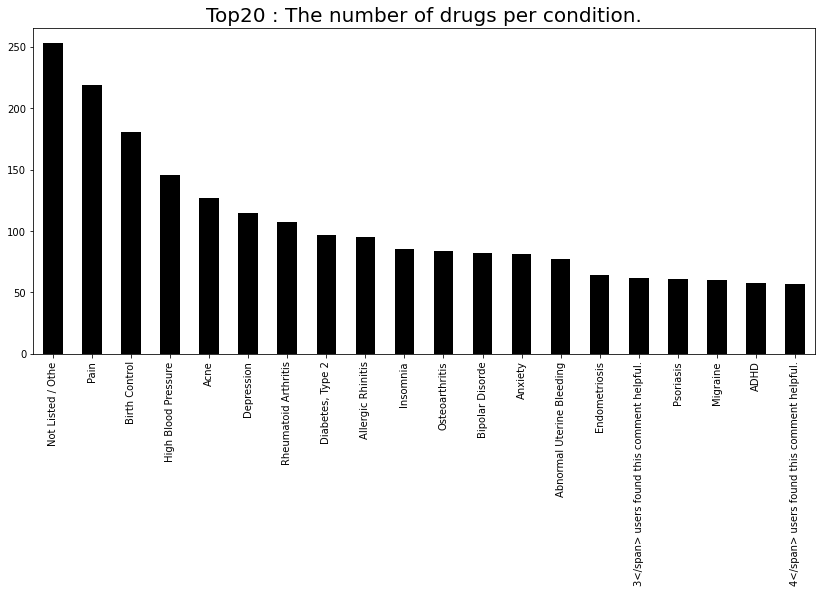

In [26]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="black")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)
plt.show()

#### As you can see from the  above virtualization , the number of drugs for top eight conditions is about 100 for each condition. 
#### On the other hand, it is noted that the phrase "3</span> users found this comment helpful" appears in the condition, which 
#### seems like an error in the crawling process:

In [27]:
df_all[df_all['condition']=='3</span> users found this comment helpful.'].head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3.0,"June 1, 2010",3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) ute...",1.0,"December 16, 2015",3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in t...",9.0,"December 12, 2015",3
6355,195303,Low-Ogestrel-21,3</span> users found this comment helpful.,"""After taking it for two months I noticed some...",8.0,"May 16, 2011",3
6968,230747,Tazorac,3</span> users found this comment helpful.,"""Started this 11 weeks ago. I am so so sad rig...",2.0,"May 31, 2016",3


In [28]:
len(df_all[df_all['condition']=='3</span> users found this comment helpful.'])

101

#### We have 101 rows containing this statement, We will remove these data in the future preprocessing
#### The following are the low 20 conditions of 'drugs per condition'. We can see observe that the number is all 1. 

<function matplotlib.pyplot.show(close=None, block=None)>

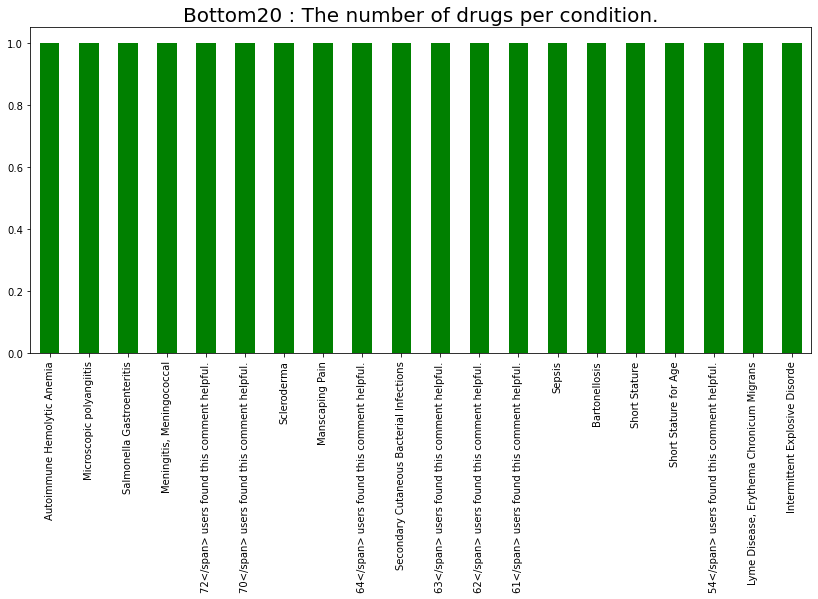

In [29]:
condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 20)
plt.show

### 1.3. Review Column Analysis

In [30]:
print(df_train['review'][1])

"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."


In [31]:
print(df_train['review'][2])

"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."


#### We noticed from only 2 reviews that there are strings like \ r \ n,
#### and the parts that express emotions in parentheses such as (very unusual for him) and (a good thing) 
#### and words in capital letters like MUCH. In addition, there were some words with errors like didn&# 039;t for didn't
#### We will be dealing with all that in the  preprocessing part. For now, we will implement the word cloud for the review column

In [32]:
#! pip install wordcloud

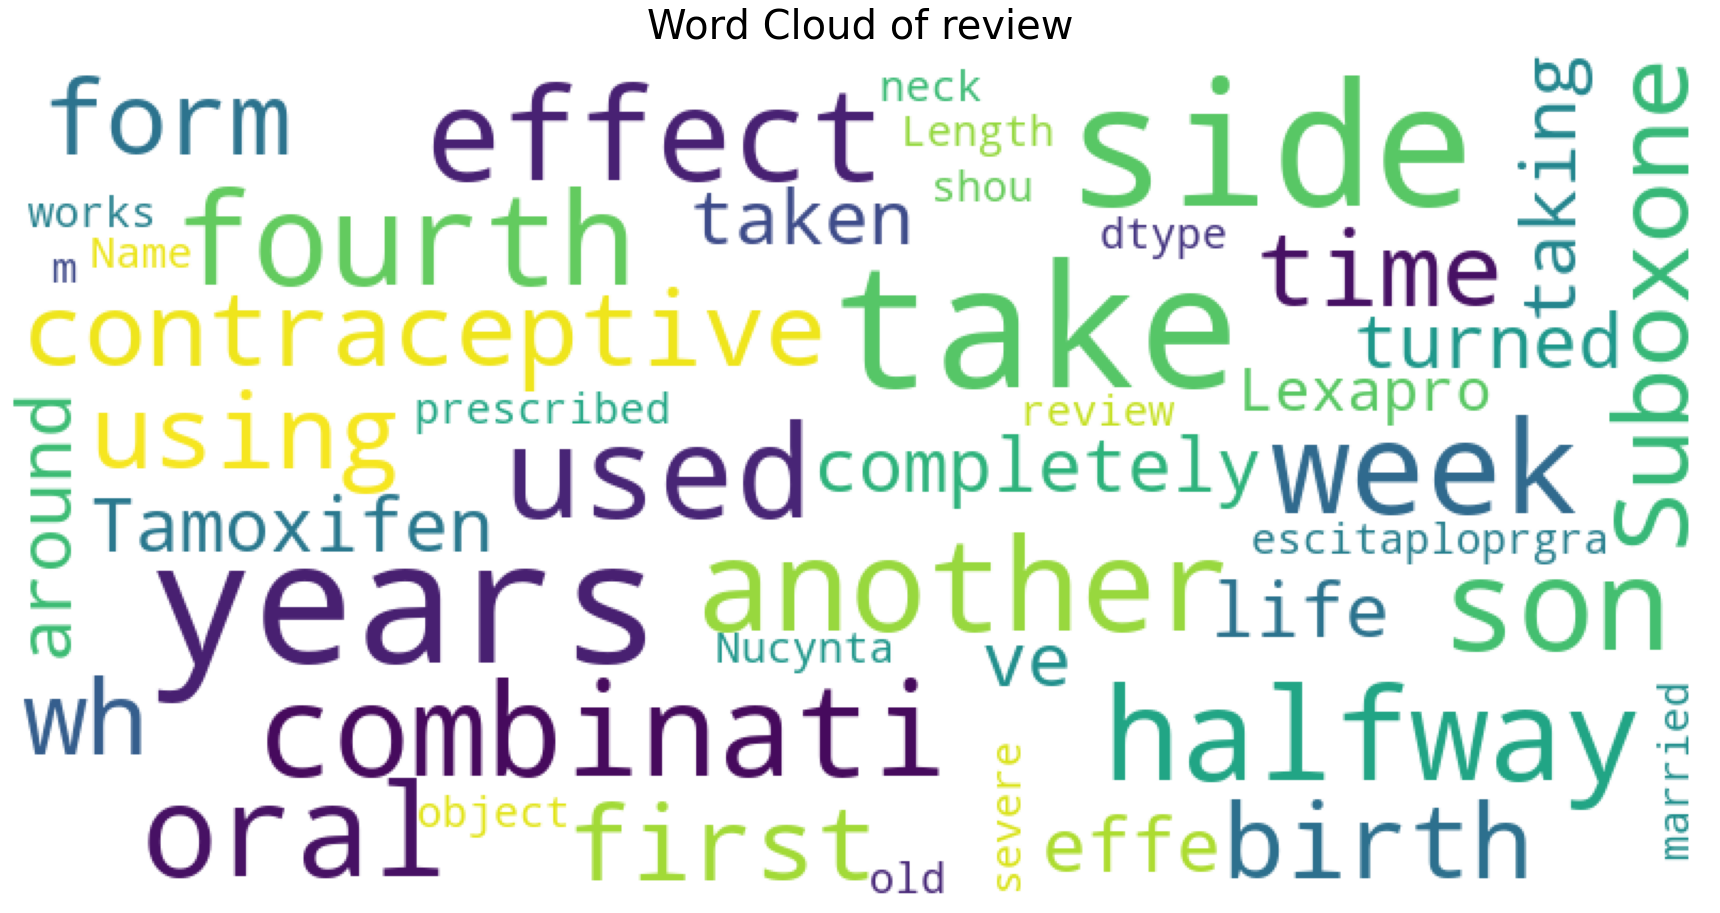

In [33]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=80, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df_all["review"], title="Word Cloud of review")
plt.show()

### 1.6.Missing Values 

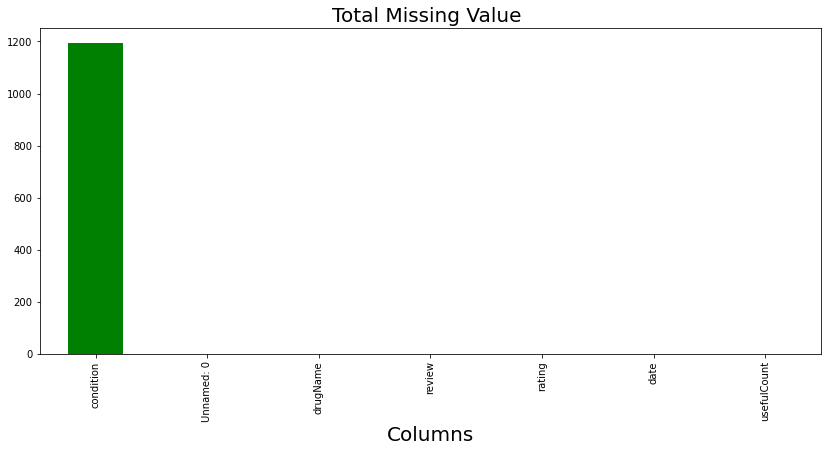

In [34]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)
plt.show()

In [35]:
# Percentage of missing values : 
print("Missing value (%):", 1200/df_all.shape[0] *100)

Missing value (%): 0.5579760349292998


#### Since the percentage is less than 1% , so we will apply omission for the rows that has missing values 

### 2. Date Preprocessing
### 2.1. Missing Values Removal 

In [107]:
df_all = df_all.dropna(axis=0)

### 2.2 Condition Preprocessing

In [37]:
#Span = df_all[df_all['condition']=='3</span> users found this comment helpful.']

In [108]:
indexNames = df_all[ df_all['condition'] == '3</span> users found this comment helpful.' ].index

In [109]:
df_all.drop(indexNames , inplace=True)

In [110]:
len(df_all[df_all['condition']=='3</span> users found this comment helpful.'])

0

### Reduce Dimentionality

In [41]:
import string
import nltk
import re
from nltk.tokenize import word_tokenize

In [111]:
# Convert to lower case:
df_all['review'] = df_all['review'].astype(str).str.lower()

In [112]:
# remove punctuations:
def remove_puncts(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_all['review'] = df_all['review'].apply(lambda x: remove_puncts(x))
df_all['review'].head()

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
2    i used to take another oral contraceptive whic...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
Name: review, dtype: object

In [113]:
#def tokenize_data(df):
 #   df_all['review'] = df_all['review'].astype(str).apply(word_tokenize)
  #  return df_all

#tokenize_data(df_all)

In [249]:
# Remove english stop words:
#from nltk.corpus import stopwords

#EngStopWords = stopwords.words('English')

#def remove_stopwords(text):
 #   text = [word for word in text if word not in EngStopWords]
  #  return text
    
#df_all['review'] = df_all['review'].apply(lambda x: remove_stopwords(x))
#df_all['review'].head(10)

In [250]:
#import nltk 
#ps = nltk.PorterStemmer()

In [251]:
#def stemming(tokenized_text):
 #   text = [ps.stem(word) for word in tokenized_text]
  #  return text 

#df_all['review']=df_all['review'].apply(lambda x: stemming(x))
#df_all.head()

### Sentimental Analysis 

In [114]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def Get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result



In [115]:
# Sentiment Score for Review
df_all['sentiment'] = df_all['review'].apply(get_sentiment)
df_all['subjective_sentiment'] = df_all['review'].apply(Get_sentiment)
df_all['sentiment_label'] = df_all['review'].apply(get_sentiment_label)

In [116]:
df_all.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,sentiment,subjective_sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,it has no side effect i take it in combination...,9.0,"May 20, 2012",27,0.000000,0.000000,neutral
1,95260,Guanfacine,ADHD,my son is halfway through his fourth week of i...,8.0,"April 27, 2010",192,0.168333,0.431349,positive
2,92703,Lybrel,Birth Control,i used to take another oral contraceptive whic...,5.0,"December 14, 2009",17,0.067210,0.402155,positive
3,138000,Ortho Evra,Birth Control,this is my first time using any form of birth ...,8.0,"November 3, 2015",10,0.179545,0.665909,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone has completely turned my life around ...,9.0,"November 27, 2016",37,0.194444,0.401389,positive


In [121]:
df_all[['review','sentiment','subjective_sentiment','sentiment_label']] 

,review,sentiment,subjective_sentiment,sentiment_label
0,it has no side effect i take it in combination...,0.000000,0.000000,neutral
1,my son is halfway through his fourth week of i...,0.168333,0.431349,positive
2,i used to take another oral contraceptive whic...,0.067210,0.402155,positive
3,this is my first time using any form of birth ...,0.179545,0.665909,positive
4,suboxone has completely turned my life around ...,0.194444,0.401389,positive
...,...,...,...,...
53761,i have taken tamoxifen for years side effects...,0.029762,0.245714,positive
53762,ive been taking lexapro escitaploprgram since ...,0.088547,0.593519,positive
53763,im married years old and i have no kids takin...,-0.075956,0.500284,negative
53764,i was prescribed nucynta for severe neckshould...,0.000000,1.000000,neutral


In [48]:
# How many positive and negative and neutral reviews?
df_all['sentiment_label'].value_counts()

positive    132467
negative     71964
neutral       9288
Name: sentiment_label, dtype: int64

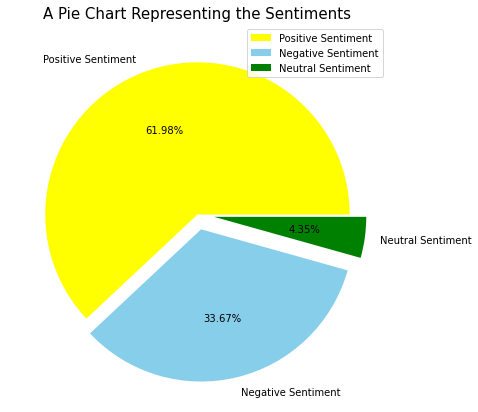

In [94]:
size = [132467,71964,9288]
colors = ['yellow', 'skyblue','green']
labels = "Positive Sentiment","Negative Sentiment",'Neutral Sentiment'
explode = [0,0.1,0.11]

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('A Pie Chart Representing the Sentiments', fontsize = 15)
plt.legend()
plt.show()

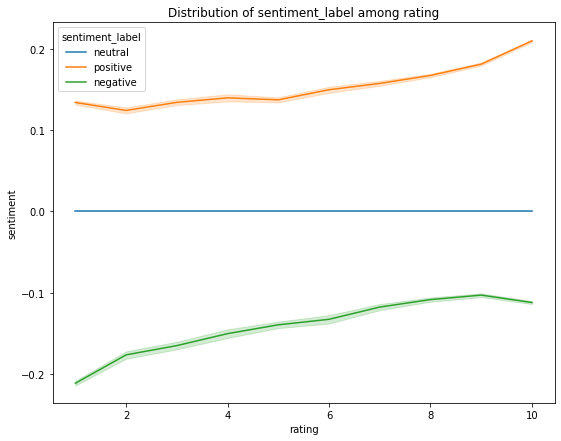

In [50]:
# Correlation  btween rating and sentiment
plt.figure(figsize=(9,7))
sns.lineplot(data=df_all,x='rating',y='sentiment',hue='sentiment_label')
plt.title('Distribution of sentiment_label among rating')
plt.show()

In [259]:
#sns.heatmap(df_all_ext.corr())

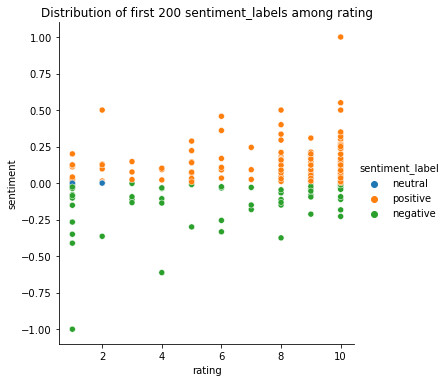

In [127]:
import seaborn as sns
df_all_ext = df_all.head(200)
#sns.set_style("whitegrid")
sns.relplot(data=df_all_ext, x='rating',y='sentiment',hue='sentiment_label').set(title = 'Distribution of first 200 sentiment_labels among rating')
#df_all_ext.head()

In [97]:
df_all_ext

,drugName,condition,subjective_sentiment,strings
0,Valsartan,Left Ventricular Dysfunction,0.000000,Valsartan Left Ventricular Dysfunction
1,Guanfacine,ADHD,0.431349,Guanfacine ADHD
2,Lybrel,Birth Control,0.402155,Lybrel Birth Control
3,Ortho Evra,Birth Control,0.665909,Ortho Evra Birth Control
4,Buprenorphine / naloxone,Opiate Dependence,0.401389,Buprenorphine / naloxone Opiate Dependence
...,...,...,...,...
197,Ulipristal,Emergency Contraception,0.704167,Ulipristal Emergency Contraception
198,Benzonatate,Cough,0.191667,Benzonatate Cough
199,Nexplanon,Birth Control,0.364063,Nexplanon Birth Control
200,Sulfamethoxazole / trimethoprim,Kidney Infections,0.639506,Sulfamethoxazole / trimethoprim Kidney Infections


### Predictions using functions and rating column: 

In [52]:
# Predictions using functions and rating column: 
data_a = df_all[['drugName','condition','rating','usefulCount']]

In [53]:
data_a.head()

,drugName,condition,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,9.0,27
1,Guanfacine,ADHD,8.0,192
2,Lybrel,Birth Control,5.0,17
3,Ortho Evra,Birth Control,8.0,10
4,Buprenorphine / naloxone,Opiate Dependence,9.0,37


In [54]:
import warnings
warnings = warnings.simplefilter('ignore')
min_rating = data_a['rating'].min()
max_rating=data_a['rating'].max()
def scale_rating(rating):
    rating -= min_rating
    rating= rating/(max_rating -1)
    rating*= 5
    rating= int(round(rating,0))
    
    if(int(rating) == 0 or int(rating) ==1 or int(rating) ==2):
        return 0 
    else: 
        return 1 
data_a['eff_score']= data_a['rating'].apply(scale_rating)

In [55]:
data_a['usefulness']= data_a['rating']*data_a['usefulCount']*data_a['eff_score']
data_a[['drugName','condition','usefulness']][data_a['usefulness']> data_a['usefulness'].mean()].sort_values(by='usefulness',ascending=False).head(10).reset_index(drop=True)

,drugName,condition,usefulness
0,Zoloft,Depression,12910.0
1,Sertraline,Depression,12910.0
2,Levonorgestrel,Birth Control,12470.0
3,Mirena,Birth Control,12470.0
4,Zoloft,Depression,8541.0
5,Sertraline,Depression,8541.0
6,Phentermine,Weight Loss,7960.0
7,Adipex-P,Weight Loss,7960.0
8,Etonogestrel,Birth Control,7300.0
9,Implanon,Birth Control,7300.0


In [56]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [57]:
@interact 
def check(condition = list(data_a['condition'].value_counts().index)):
    return data_a[data_a['condition']== condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

In [58]:
@interact
def high_low_rate(condition= list(data_a['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    x = data_a[data_a['condition']== condition][['drugName','usefulness']].sort_values(by = 'usefulness', ascending=False).head().reset_index(drop=True)
    print(x)
    print(type(x))
    print("\n\n Bottom 5 Drugs")
    print(data_a[data_a['condition'] == condition][['drugName','usefulness']].sort_values(by= 'usefulness',ascending= True).head().reset_index(drop=True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

### Random Forest Model 

In [59]:
df_all = df_all[['drugName','condition','subjective_sentiment']]

In [60]:
df_all.head()

,drugName,condition,subjective_sentiment
0,Valsartan,Left Ventricular Dysfunction,0.000000
1,Guanfacine,ADHD,0.431349
2,Lybrel,Birth Control,0.402155
3,Ortho Evra,Birth Control,0.665909
4,Buprenorphine / naloxone,Opiate Dependence,0.401389


In [61]:
df_all['strings']=df_all['drugName'] + ' ' + df_all['condition']

In [62]:
df_all

,drugName,condition,subjective_sentiment,strings
0,Valsartan,Left Ventricular Dysfunction,0.000000,Valsartan Left Ventricular Dysfunction
1,Guanfacine,ADHD,0.431349,Guanfacine ADHD
2,Lybrel,Birth Control,0.402155,Lybrel Birth Control
3,Ortho Evra,Birth Control,0.665909,Ortho Evra Birth Control
4,Buprenorphine / naloxone,Opiate Dependence,0.401389,Buprenorphine / naloxone Opiate Dependence
...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",0.245714,"Tamoxifen Breast Cancer, Prevention"
53762,Escitalopram,Anxiety,0.593519,Escitalopram Anxiety
53763,Levonorgestrel,Birth Control,0.500284,Levonorgestrel Birth Control
53764,Tapentadol,Pain,1.000000,Tapentadol Pain


In [63]:
data = df_all[['strings','subjective_sentiment']]

In [64]:
data.head()

,strings,subjective_sentiment
0,Valsartan Left Ventricular Dysfunction,0.000000
1,Guanfacine ADHD,0.431349
2,Lybrel Birth Control,0.402155
3,Ortho Evra Birth Control,0.665909
4,Buprenorphine / naloxone Opiate Dependence,0.401389


In [65]:
 vec = pd.get_dummies(data['strings'])

In [66]:
vec

,A + D Cracked Skin Relief Bacterial Skin Infection,A / B Otic Otitis Media,Abacavir / dolutegravir / lamivudine HIV Infection,Abacavir / lamivudine / zidovudine HIV Infection,Abacavir / lamivudine HIV Infection,Abatacept Juvenile Idiopathic Arthritis,Abatacept Rheumatoid Arthritis,Abilify 20</span> users found this comment helpful.,Abilify Agitated State,Abilify Autism,...,Zyvox Pneumonia,Zyvox Skin and Structure Infection,ZzzQuil Insomnia,depo-subQ provera 104 Birth Control,ella Emergency Contraception,femhrt 0</span> users found this comment helpful.,femhrt Acne,femhrt Menstrual Disorders,femhrt Postmenopausal Symptoms,"pHisoHex Skin Disinfection, Preoperative"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#vec.describe()

In [68]:
#df_new = pd.concat([data,vec])

In [67]:
#dfx = vec.iloc[0:10000,:]

In [68]:
#data_st_new = data.drop('strings',axis = 1)

In [69]:
#dfy = data_st_new.iloc[0:10000,:]

In [325]:
y = data['sentiment']
y = y.astype('int')

In [326]:
x = vec

In [70]:
# Splitting data: 
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=20)

In [72]:
# Random Forest Regressor: 
from sklearn.ensemble import RandomForestRegressor
# Create a model
model = RandomForestRegressor(n_estimators=10, random_state= 30)

In [73]:
# fit the model: 
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=30)

In [74]:
# Test our model: 
prediction_test = model.predict(X_test)
#print(prediction_test)

In [75]:
import sklearn
import math 

In [78]:
import sklearn
import math 
mse = sklearn.metrics.mean_squared_error(y_test,prediction_test)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse))

Accuracy for Random Forest 77.95810994070516


In [79]:
def sentimental_prediction(c):
    i = vec.loc[vec[c]==1]
    ii= i.iloc[:1,:]
    iii= model.predict(ii)
    print(" The sentiment for your drug is " , iii)

In [80]:
#df1  = df_all[['condition','drugName']]
datas = data.loc[:,:]
datas = datas.drop('subjective_sentiment', axis = 1)
datas

,strings
0,Valsartan Left Ventricular Dysfunction
1,Guanfacine ADHD
2,Lybrel Birth Control
3,Ortho Evra Birth Control
4,Buprenorphine / naloxone Opiate Dependence
...,...
53761,"Tamoxifen Breast Cancer, Prevention"
53762,Escitalopram Anxiety
53763,Levonorgestrel Birth Control
53764,Tapentadol Pain


In [81]:
df1 = datas.drop_duplicates()
print(df1)

                                                 strings
0                 Valsartan Left Ventricular Dysfunction
1                                        Guanfacine ADHD
2                                   Lybrel Birth Control
3                               Ortho Evra Birth Control
4             Buprenorphine / naloxone Opiate Dependence
...                                                  ...
53570  Vyvanse 5</span> users found this comment help...
53577                              Dexamethasone Uveitis
53605                             Oxybutynin Prostatitis
53628                             Allergy DN PE Rhinitis
53682                    Zoledronic acid Paget's Disease

[9384 rows x 1 columns]


In [82]:
def sentiment_pred(QW):
    i = vec.loc[vec[QW]==1]
    ii= i.iloc[:1,:]
    iii= model.predict(ii)
    return(iii)

In [83]:
a= input("What is your condition ")
ee = input("What is the Drug name ")
c = ee + " "+ a
sentimental_prediction(c)

What is your condition Birth Control
What is the Drug name Lybrel
 The sentiment for your drug is  [0.43998654]


In [84]:
contain_values = df1[df1['strings'].str.contains(a)]
print (contain_values)

                                                strings
2                                  Lybrel Birth Control
3                              Ortho Evra Birth Control
9      Ethinyl estradiol / levonorgestrel Birth Control
14                              Nexplanon Birth Control
22                           Etonogestrel Birth Control
...                                                 ...
19347                           Deblitane Birth Control
20912                        Zovia 1 / 50 Birth Control
33531                   Dasetta 7 / 7 / 7 Birth Control
37305                           Emoquette Birth Control
43291                  Cyclafem 7 / 7 / 7 Birth Control

[181 rows x 1 columns]


In [85]:
p = len(contain_values)
contain_values.index = range(p)

In [86]:
contain_values

,strings
0,Lybrel Birth Control
1,Ortho Evra Birth Control
2,Ethinyl estradiol / levonorgestrel Birth Control
3,Nexplanon Birth Control
4,Etonogestrel Birth Control
...,...
176,Deblitane Birth Control
177,Zovia 1 / 50 Birth Control
178,Dasetta 7 / 7 / 7 Birth Control
179,Emoquette Birth Control


In [87]:
z = 0
list=[]
while z < len(contain_values):
    QW = contain_values.iloc[z,0] 
    b = sentiment_pred(QW)
    list.append(b)
    z += 1
df_sent = pd.DataFrame(list,columns=['sentiments_pred'])
df_sent

,sentiments_pred
0,0.439987
1,0.568073
2,0.526399
3,0.528420
4,0.513383
...,...
176,0.503273
177,0.503273
178,0.503273
179,0.503273


In [88]:
contain_values['sentiments_pred'] = df_sent

In [89]:
contain_values

,strings,sentiments_pred
0,Lybrel Birth Control,0.439987
1,Ortho Evra Birth Control,0.568073
2,Ethinyl estradiol / levonorgestrel Birth Control,0.526399
3,Nexplanon Birth Control,0.528420
4,Etonogestrel Birth Control,0.513383
...,...,...
176,Deblitane Birth Control,0.503273
177,Zovia 1 / 50 Birth Control,0.503273
178,Dasetta 7 / 7 / 7 Birth Control,0.503273
179,Emoquette Birth Control,0.503273


In [90]:
df_sort = contain_values.sort_values('sentiments_pred',ascending = False)
df_des = df_sort.head(5)
df_des

,strings,sentiments_pred
83,Yasmin Birth Control,0.657578
91,Gianvi Birth Control,0.655760
51,Camrese Birth Control,0.651798
98,Cyclafem 1 / 35 Birth Control,0.647635
29,Microgestin Fe 1 / 20 Birth Control,0.633374


In [91]:
list1 = []
u=0
while u < len(df_des):
    ui = df_des.iloc[u,0].replace(a,'')
    list1.append(ui)
    u += 1
if df_des['strings'].str.contains(ee).any():
    print ("I recommend your drug, it is in the top 5 list for this condition")
else:
    print('This drug is not in the top 5 list for this condition, I would recommend one of the following: ')
    print(list1)

This drug is not in the top 5 list for this condition, I would recommend one of the following: 
['Yasmin ', 'Gianvi ', 'Camrese ', 'Cyclafem 1 / 35 ', 'Microgestin Fe 1 / 20 ']


In [92]:
def drug_recommender():
    a= input("What is your condition ")
    ee = input("What is the Drug name ")
    c = ee + " "+ a
    contain_values = df1[df1['strings'].str.contains(a)]
    p = len(contain_values)
    contain_values.index = range(p)
    z = 0
    list=[]
    while z < len(contain_values):
        QW = contain_values.iloc[z,0] 
        b = sentiment_pred(QW)
        list.append(b)
        z += 1
    df_sent = pd.DataFrame(list,columns=['sentiments_pred'])
    contain_values['sentiments_pred'] = df_sent
    df_sort = contain_values.sort_values('sentiments_pred',ascending = False)
    df_des = df_sort.head(5)
    list1 = []
    u=0
    while u < len(df_des):
        ui = df_des.iloc[u,0].replace(a,'')
        list1.append(ui)
        u += 1
    if ee == 'No' or ee == 'No drug name':
         print('I recommend the followiing top 5 drugs for your condition: ')
         print(list1)
    elif df_des['strings'].str.contains(ee).any():
        print ("I recommend your drug, it is in the top 5 list for this condition")
    else:
        print('This drug is not in the top 5 list for this condition, I would recommend one of the following: ')
        print(list1)
    

In [252]:
drug_recommender()

What is your condition Birth Control
What is the Drug name Lybrel
This drug is not in the top 5 list for this condition, I would recommend one of the following: 
['Yasmin ', 'Gianvi ', 'Camrese ', 'Cyclafem 1 / 35 ', 'Microgestin Fe 1 / 20 ']


In [270]:
drug_recommender()

What is your condition Birth Control
What is the Drug name Yasmin
I recommend your drug, it is in the top 5 list for this condition


In [269]:
drug_recommender()

What is your condition Diabetic Peripheral Neuropathy
What is the Drug name Pregabalin
I recommend your drug, it is in the top 5 list for this condition


In [267]:
drug_recommender()

What is your condition ADHD
What is the Drug name No
I recommend the followiing top 5 drugs for your condition: 
['Nuvigil ', 'Desoxyn ', 'Zenzedi ', 'Ritalin ', 'Dexedrine ']


In [268]:
drug_recommender()

What is your condition Diabetic Peripheral Neuropathy
What is the Drug name No
I recommend the followiing top 5 drugs for your condition: 
['Pregabalin ', 'Capsaicin ', 'Topiramate ', 'Neurontin ', 'Capzasin-HP ']
